In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense

# 실습 

### 금융 회사의 고객 이탈 여부를 logistic regression 으로 예측

- customer_id, 미사용 변수.  
- 입력으로 사용되는 credit_score.  
- 국가  
- 성별  
- 나이  
- 가입 기간  
-  잔고  
- products_number  
- 신용 카드   
- active_member  
- 예상 급여  
- churn. 고객이 은행을 떠난 경우 1이고 그렇지 않은 경우 0  

In [2]:
churn_df = pd.read_csv("datasets/Bank Customer Churn Prediction.csv")
churn_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data pre-processing and feature selection

개별 feature 에 대한 분석 후(본 과정에서는 생략)에 Logistic Regression 에 사용할 feature 선정

- customer_id 는 예측에 무관하므로 삭제  
- country, gender는 one-hot-encoding

In [3]:
churn_df.drop('customer_id', axis=1, inplace=True)
churn_df = pd.get_dummies(churn_df, columns=['country', 'gender'])
churn_df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [4]:
y = churn_df.pop('churn').values
X = churn_df.values
X.shape, y.shape

((10000, 13), (10000,))

### Train/Test dataset 분리

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

### feature scaling

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [7]:
model = tf.keras.Sequential()

model.add(Dense(64, input_shape=(13,), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

### train the model

In [9]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
250/250 [==============================] - 1s 1ms/step - loss: 0.4554 - accuracy: 0.8015 - val_loss: 0.4087 - val_accuracy: 0.8250
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3844 - accuracy: 0.8361 - val_loss: 0.3615 - val_accuracy: 0.8580
Epoch 3/20
250/250 [==============================] - 0s 971us/step - loss: 0.3532 - accuracy: 0.8561 - val_loss: 0.3544 - val_accuracy: 0.8480
Epoch 4/20
250/250 [==============================] - 0s 992us/step - loss: 0.3441 - accuracy: 0.8576 - val_loss: 0.3444 - val_accuracy: 0.8615
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8599 - val_loss: 0.3391 - val_accuracy: 0.8610
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.8631 - val_loss: 0.3416 - val_accuracy: 0.8625
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8631 - val_loss: 0.3413 - val_accuracy: 0.8560
Ep

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)

print(model.metrics_names)
print("Test loss : {:.2f}".format(score[0]))
print("Test accuracy : {:.2f}".format(score[1]))

['loss', 'accuracy']
Test loss : 0.34
Test accuracy : 0.85


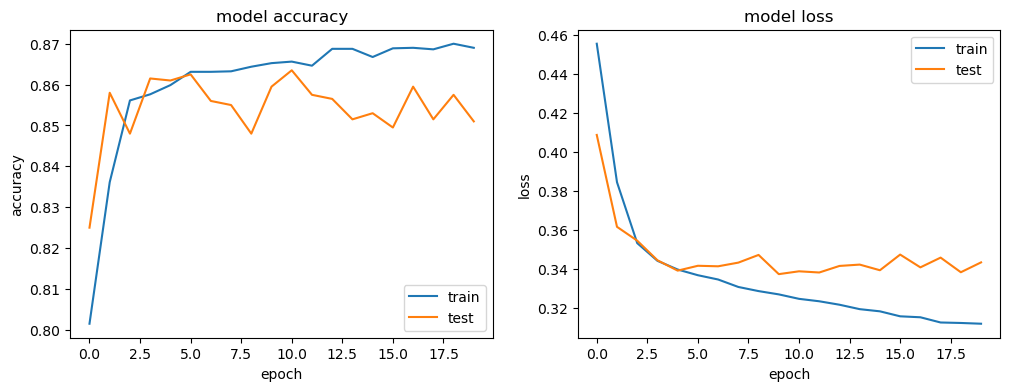

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

In [12]:
y_pred = model.predict(X_test) > 0.5

accuracy_score(y_test, y_pred)

63/63 [==============================] - 0s 692us/step


0.851

## confusion matrix 를 이용한 model 평가

confution matrix
 [[1483  112]
 [ 186  219]]


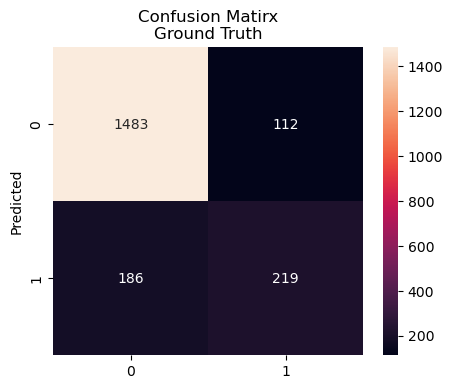

In [13]:
cm  = confusion_matrix(y_test, y_pred)

print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matirx\nGround Truth')
None